In [28]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 16

In [29]:
path = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images'
images_df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv")
styles_df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')

In [30]:
images_df.head()

filename                                               link
0  15970.jpg  http://assets.myntassets.com/v1/images/style/p...
1  39386.jpg  http://assets.myntassets.com/v1/images/style/p...
2  59263.jpg  http://assets.myntassets.com/v1/images/style/p...
3  21379.jpg  http://assets.myntassets.com/v1/images/style/p...
4  53759.jpg  http://assets.myntassets.com/v1/images/style/p...

In [31]:
styles_df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

In [32]:
styles_df['filename'] = styles_df['id'].astype(str) + '.jpg'
styles_df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName   filename  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012.0  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016.0  Casual                       Titan Women Silver Watch  59263.jpg  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012.0  Casual                          Puma Men Grey T-shirt  53759.jpg

In [33]:
image_files = os.listdir(path)

In [34]:
styles_df['present'] = styles_df['filename'].apply(lambda x: x in image_files)

In [35]:
styles_df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName   filename  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg   
1  2012.0  Casual             Peter England Men Party Blue Jeans  39386.jpg   
2  2016.0  Casual                       Titan Women Silver Watch  59263.jpg   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  21379.jpg   
4  2012.0  Casual                          Puma Men Grey T-shirt  53759.jpg   

   present  
0     True  
1     True  
2     True  
3     True  
4     True

In [36]:
styles_df = styles_df[styles_df['present']].reset_index(drop=True)

In [37]:
styles_df

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44414  17036    Men       Footwear       Shoes           Casual Shoes   
44415   6461    Men       Footwear  Flip Flops             Flip Flops   
44416  18842    Men        Apparel     Topwear                Tshirts   
44417  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44418  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44414      White  Summer  2013.0  Casual   
44415        Red  Summer  2011.0  Casual   
44416       Blue    Fall  2011.0  Casual   
44417       Blue  Spring  2017.0  Casual   
44418       Pink  Winter  2016.0  Casual   

                                    productDisplayName   filename  present  
0                     Turtle Check Men Navy Blue Shirt  15970.jpg     True  
1                   Peter England Men Party Blue Jeans  39386.jpg     True  
2                             Titan Women Silver Watch  59263.jpg     True  
3        Manchester United Men Solid Black Track Pants  21379.jpg     True  
4                                Puma Men Grey T-shirt  53759.jpg     True  
...                                                ...        ...      ...  
44414                        Gas Men Caddy Casual Shoe  17036.jpg     True  
44415               Lotto Men's Soccer Track Flip Flop   6461.jpg     True  
44416             Puma Men Graphic Stellar Blue Tshirt  18842.jpg     True  
44417                   Rasasi Women Blue Lady Perfume  46694.jpg     True  
44418  Fossil Women Pink Dial Chronograph Watch ES3050  51623.jpg     True  

[44419 rows x 12 columns]

In [38]:
styles_df = styles_df.sample(10000)

In [39]:
styles_df

id gender masterCategory subCategory   articleType baseColour  \
34136  43063    Men        Apparel     Topwear       Tshirts        Red   
1958   14659    Men        Apparel  Bottomwear      Trousers      Khaki   
44306  17694    Men       Footwear       Shoes  Casual Shoes  Navy Blue   
38961  59049  Women       Footwear       Shoes         Heels      Black   
20351  57375  Women        Apparel   Innerwear        Briefs      White   
...      ...    ...            ...         ...           ...        ...   
33307  22611    Men        Apparel     Topwear       Tshirts      Green   
28181  33999  Women        Apparel     Topwear        Shirts      Black   
41788  54553  Women        Apparel     Topwear        Kurtas      Black   
27775  25665    Men    Accessories     Watches       Watches      Black   
29295  33306   Boys        Apparel  Bottomwear         Jeans       Grey   

       season    year   usage                         productDisplayName  \
34136  Summer  2012.0  Casual     Nike Men Red Portugal Football T-shirt   
1958     Fall  2011.0  Casual        Probase Men Solid LT.Khaki Trousers   
44306    Fall  2011.0  Casual  Vans Men Authentic Navy Blue Casual Shoes   
38961  Winter  2012.0  Casual           Carlton London Women Black Heels   
20351  Winter  2015.0  Casual           Amante Women White Briefs PFCL01   
...       ...     ...     ...                                        ...   
33307    Fall  2011.0  Sports                      Nike Men Green Jersey   
28181  Summer  2012.0  Casual             Femella Women Check Grey Shirt   
41788  Summer  2012.0  Ethnic      Global Desi Women Black Printed Kurta   
27775  Winter  2016.0  Casual   Fastrack Men Black Dial Watch NE3001SL05   
29295  Summer  2012.0  Casual       Gini and Jony Boys Washed Grey Jeans   

        filename  present  
34136  43063.jpg     True  
1958   14659.jpg     True  
44306  17694.jpg     True  
38961  59049.jpg     True  
20351  57375.jpg     True  
...          ...      ...  
33307  22611.jpg     True  
28181  33999.jpg     True  
41788  54553.jpg     True  
27775  25665.jpg     True  
29295  33306.jpg     True  

[10000 rows x 12 columns]

In [40]:
styles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 34136 to 29295
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  int64  
 1   gender              10000 non-null  object 
 2   masterCategory      10000 non-null  object 
 3   subCategory         10000 non-null  object 
 4   articleType         10000 non-null  object 
 5   baseColour          9996 non-null   object 
 6   season              9996 non-null   object 
 7   year                10000 non-null  float64
 8   usage               9936 non-null   object 
 9   productDisplayName  9999 non-null   object 
 10  filename            10000 non-null  object 
 11  present             10000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 947.3+ KB


In [41]:
img_size = 224
datagen = ImageDataGenerator(rescale=1/255.) 
generator = datagen.flow_from_dataframe(dataframe=styles_df,
                                        directory=path,
                                        target_size=(img_size,img_size),
                                        x_col='filename',
                                        class_mode=None,
                                        batch_size=32,
                                        shuffle=False,
                                        classes=None)


Found 10000 validated image filenames.


In [42]:
base_model = VGG16(include_top=False, input_shape=(img_size,img_size,3))

for layer in base_model.layers:
    layer.trainable = False
    
input_layer = Input(shape=(img_size,img_size,3))
x = base_model(input_layer)
output = GlobalAveragePooling2D()(x)

embeddings = Model(inputs=input_layer, outputs=output)
embeddings.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [45]:
base_model = ResNet50(include_top=False, input_shape=(img_size,img_size,3))

for layer in base_model.layers:
    layer.trainable = False
    
input_layer = Input(shape=(img_size,img_size,3))
x = base_model(input_layer)
output = GlobalAveragePooling2D()(x)

embeddings_1 = Model(inputs=input_layer, outputs=output)
embeddings_1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [46]:
base_model = InceptionV3(include_top=False, input_shape=(img_size,img_size,3))

for layer in base_model.layers:
    layer.trainable = False
    
input_layer = Input(shape=(img_size,img_size,3))
x = base_model(input_layer)
output = GlobalAveragePooling2D()(x)

embeddings_1 = Model(inputs=input_layer, outputs=output)
embeddings_1.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
Total params: 21,802,784
Trainable params: 0
Non-trainable params: 21,802,784
_________________________________________________________________


In [47]:
X = embeddings.predict(generator, verbose=1)


313/313 [==============================] - 1093s 3s/step


In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(2)
X_pca = pca.fit_transform(X)

In [50]:
styles_df[['pc1','pc2']] = X_pca


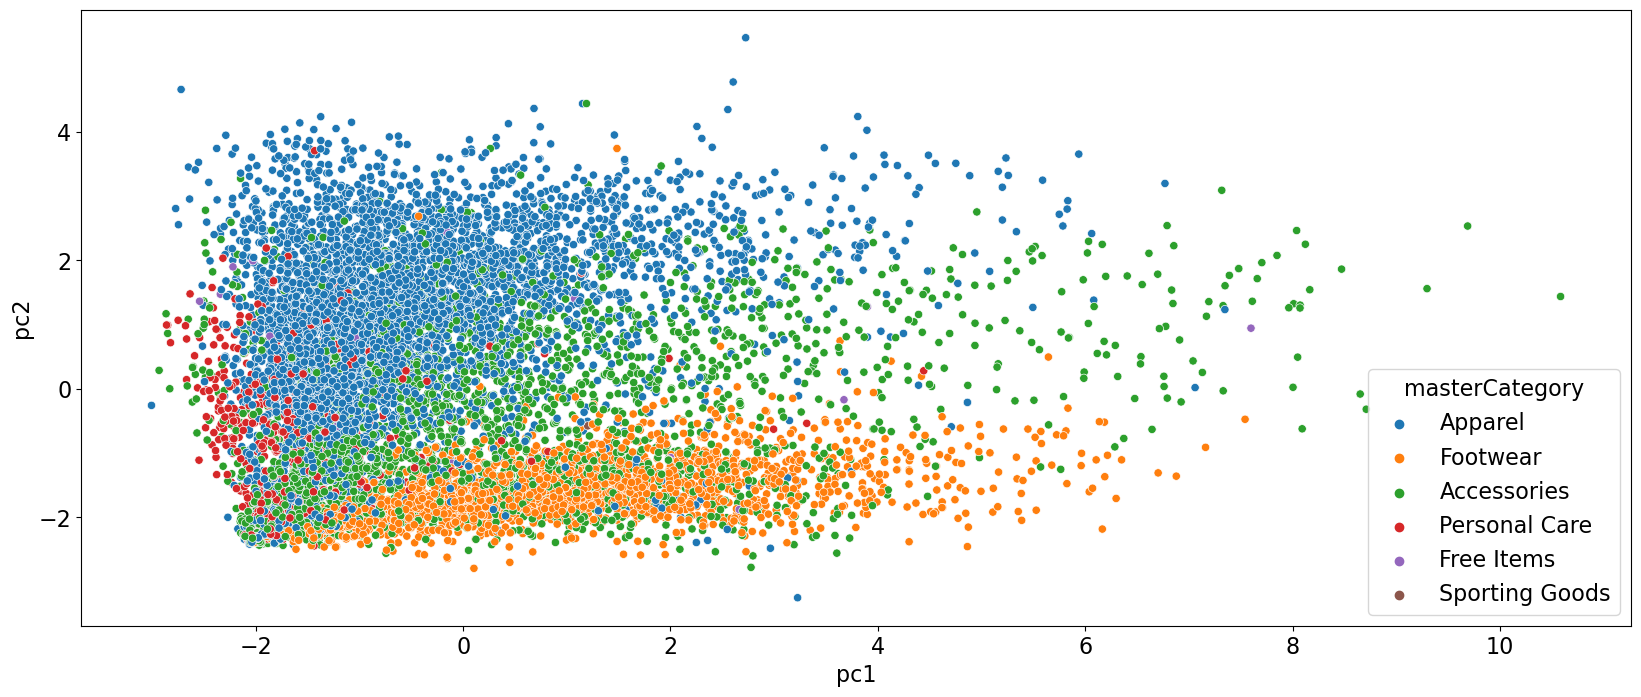

In [51]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='pc1',y='pc2', data=styles_df, hue='masterCategory')
plt.show()

In [52]:
def read_img(image_path):
    image = load_img(os.path.join(path,image_path),target_size=(img_size,img_size,3))
    image = img_to_array(image)
    image = image/255.
    return image

In [53]:
import random
from sklearn.neighbors import KNeighborsClassifier

In [55]:
y = styles_df['id']

In [56]:
nearest_neighbours = KNeighborsClassifier(n_neighbors=7)
nearest_neighbours.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

In [57]:
styles_df = styles_df.reset_index(drop=True)

In [58]:
X.shape

(10000, 2048)

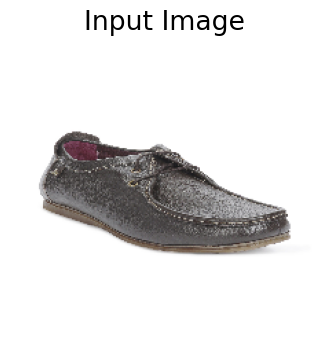

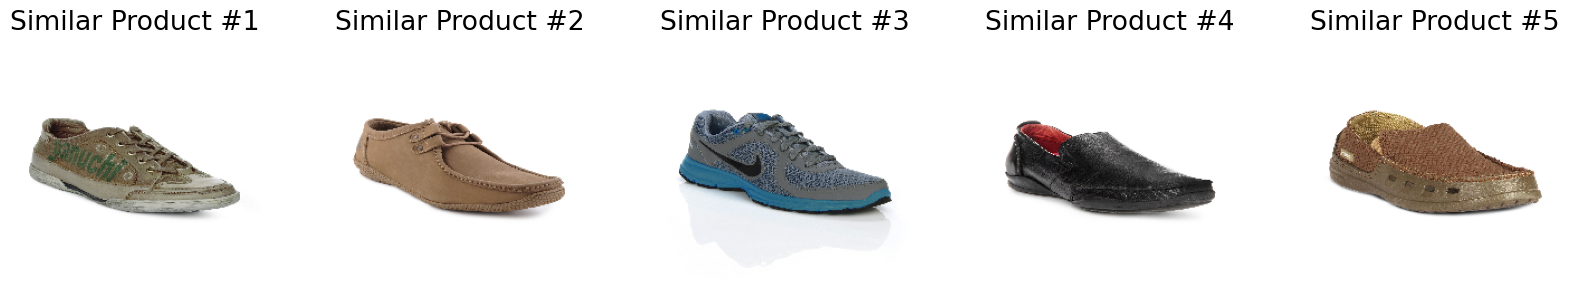

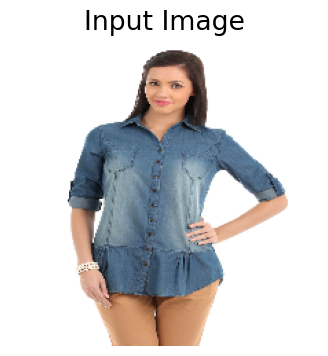

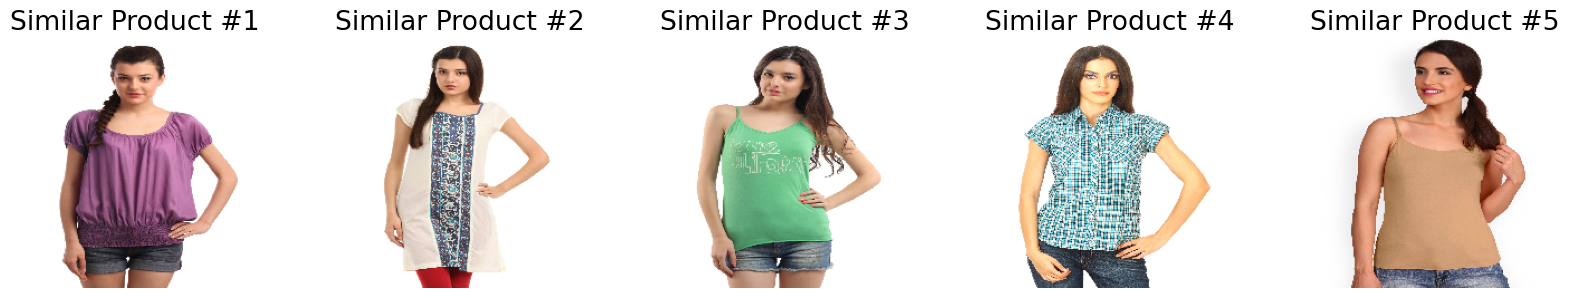

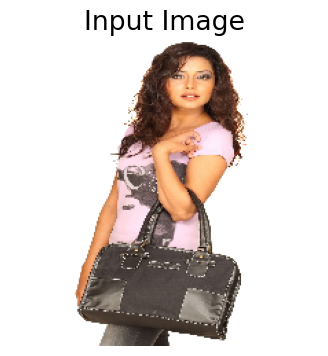

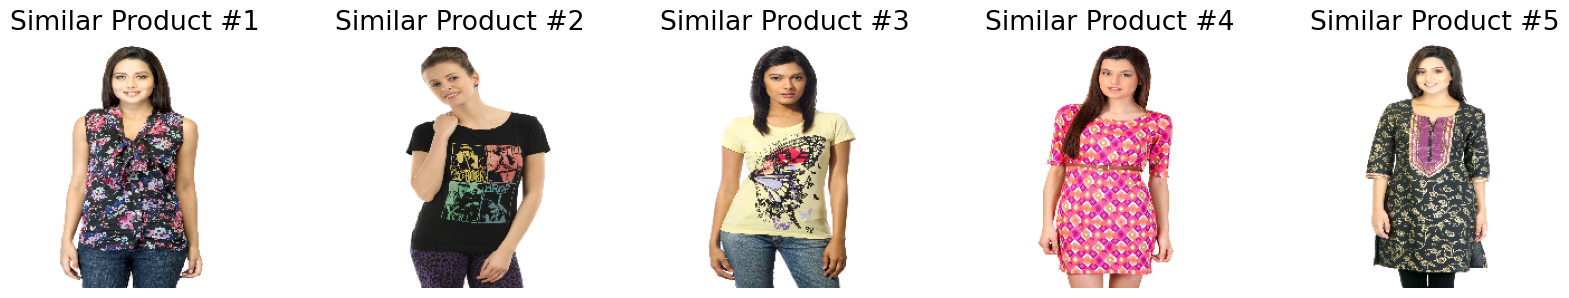

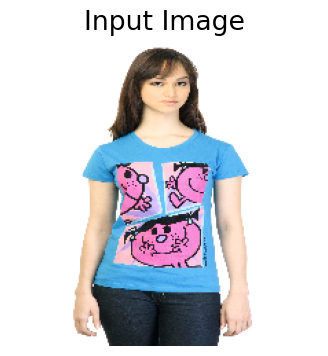

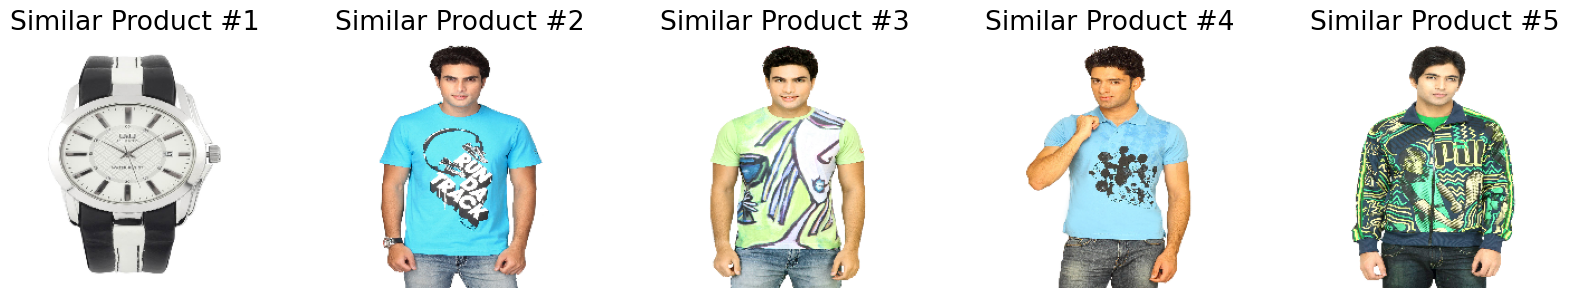

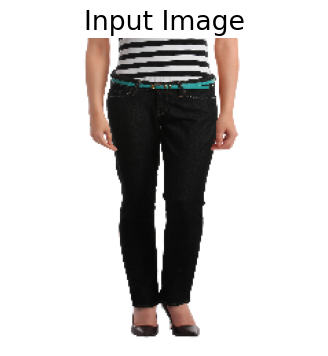

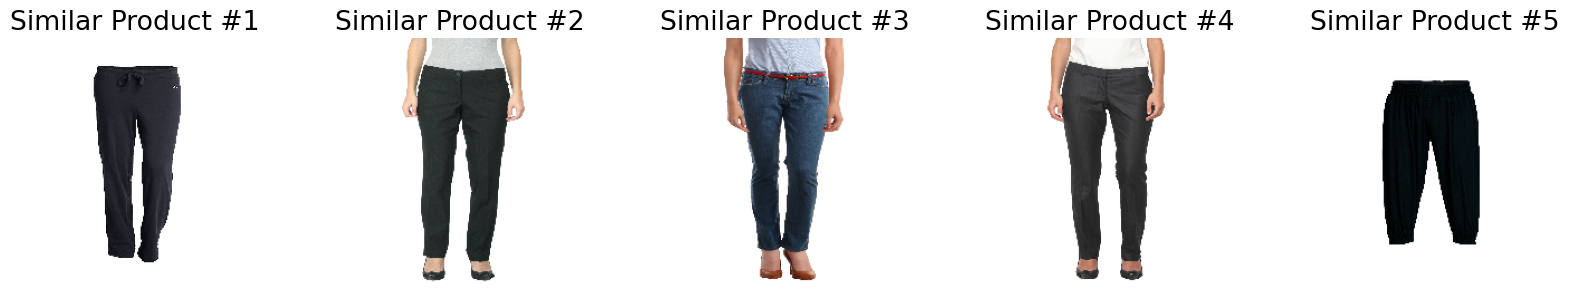

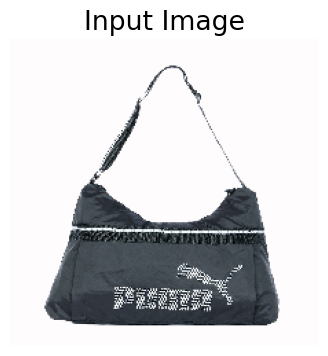

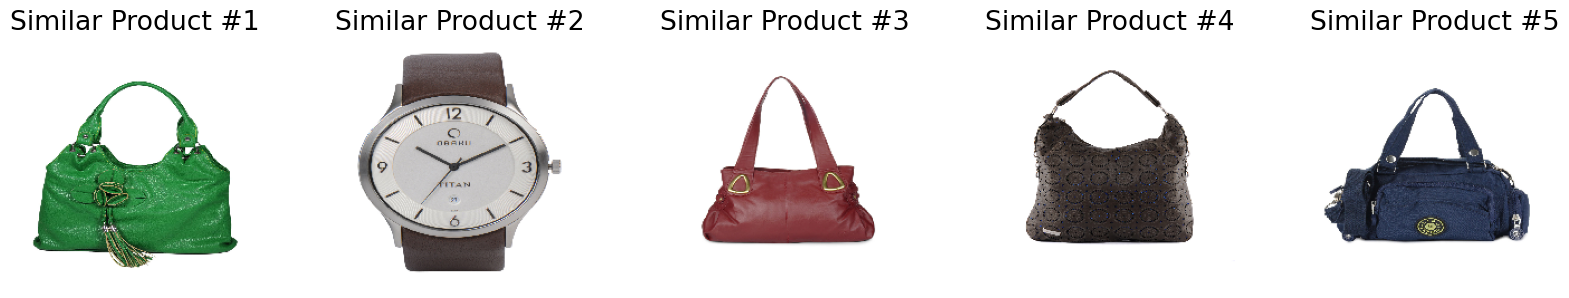

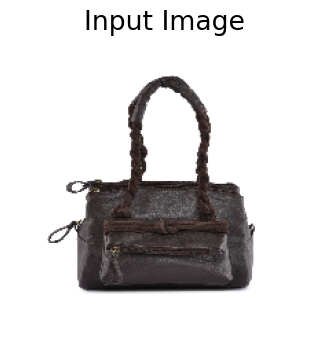

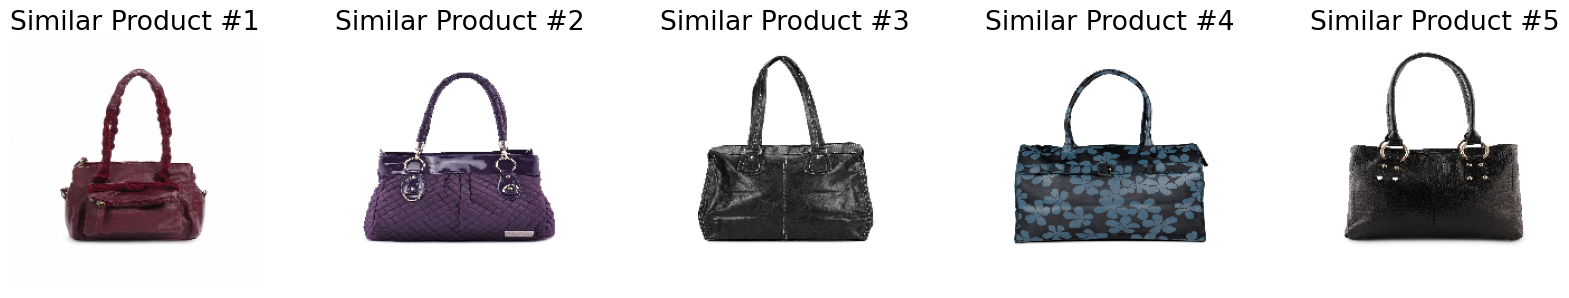

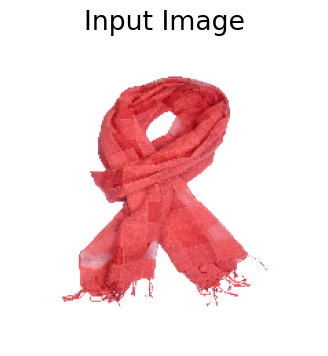

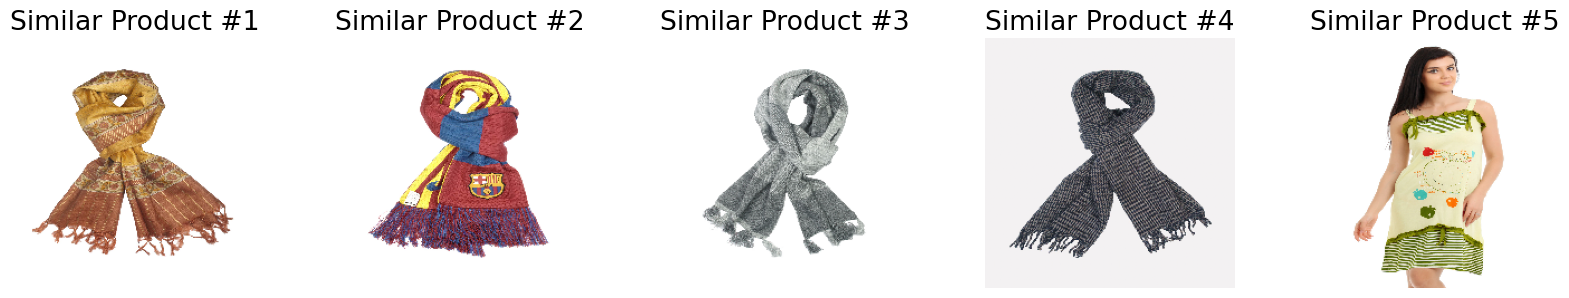

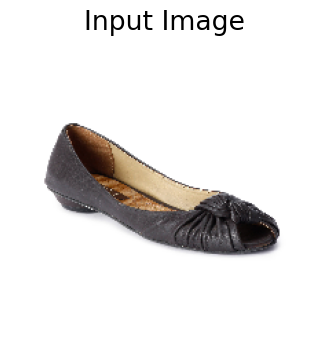

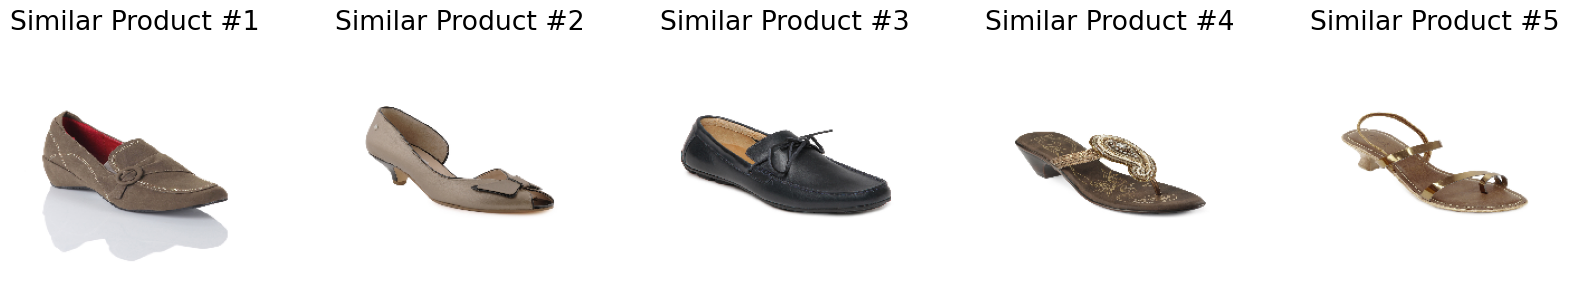

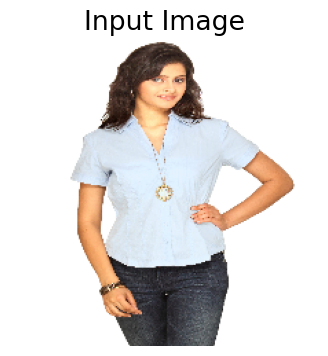

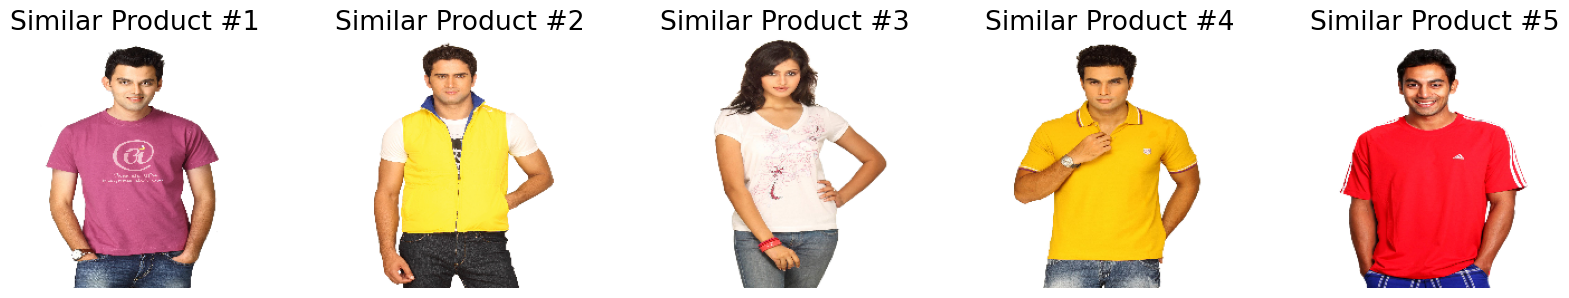

In [59]:
for _ in range(10):
    i = random.randint(0,len(styles_df))
    img1 = read_img(styles_df.loc[i,'filename'])
    dist, index = nearest_neighbours.kneighbors(X=X[i,:].reshape(1,-1))
    plt.figure(figsize = (4 , 4))
    plt.imshow(img1)
    plt.title("Input Image")
    plt.axis('off')
    
    plt.figure(figsize = (20 , 20))
    for i in range(1,6):
        plt.subplot(1 , 5, i)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = read_img(styles_df.loc[index[0][i],'filename'])
        plt.imshow(image)
        plt.title(f'Similar Product #{i}')
        plt.axis('off')